In [ ]:
!pip install matplotlib numpy scipy pandas jupyter notebook

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Irradiance Trace Visualization

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Dec 29 12:26:39 2020', '__version__': '1.0', '__globals__': [], 'Gmonth': array([[0.00000000e+00, 0.00000000e+00],
       [9.00000000e+02, 6.76852745e+01],
       [1.80000000e+03, 7.77214440e+01],
       ...,
       [7.73460000e+06, 0.00000000e+00],
       [7.73550000e+06, 0.00000000e+00],
       [7.73640000e+06, 0.00000000e+00]], shape=(4770, 2))}
Shape: (4770, 2)
Timestamp:
[0.0000e+00 9.0000e+02 1.8000e+03 ... 7.7346e+06 7.7355e+06 7.7364e+06]
Irradiance:
[ 0.         67.68527452 77.72144401 ...  0.          0.
  0.        ]


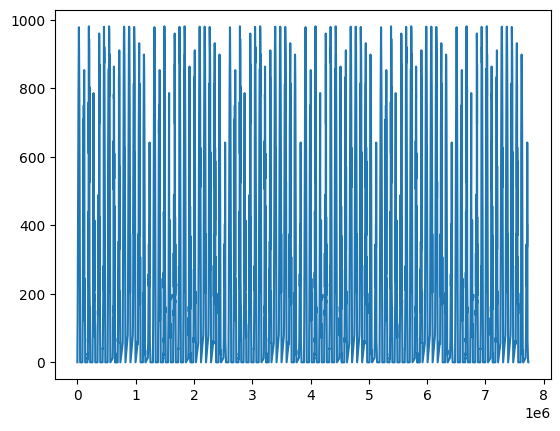

In [6]:
# Load the .mat file
mat_file = scipy.io.loadmat('gmonths.mat')

# Display the contents of the .mat file
print(mat_file)  # -> dict
print(f"Shape: {mat_file['Gmonth'].shape}")
timestamp = mat_file['Gmonth'][:, 0]  # [s]
irradiance = mat_file['Gmonth'][:, 1]  # [W/m^2]
print(f"Timestamp:\n{timestamp}")
print(f"Irradiance:\n{irradiance}")

# Plot
fig, ax = plt.subplots()
ax.plot(timestamp, irradiance)

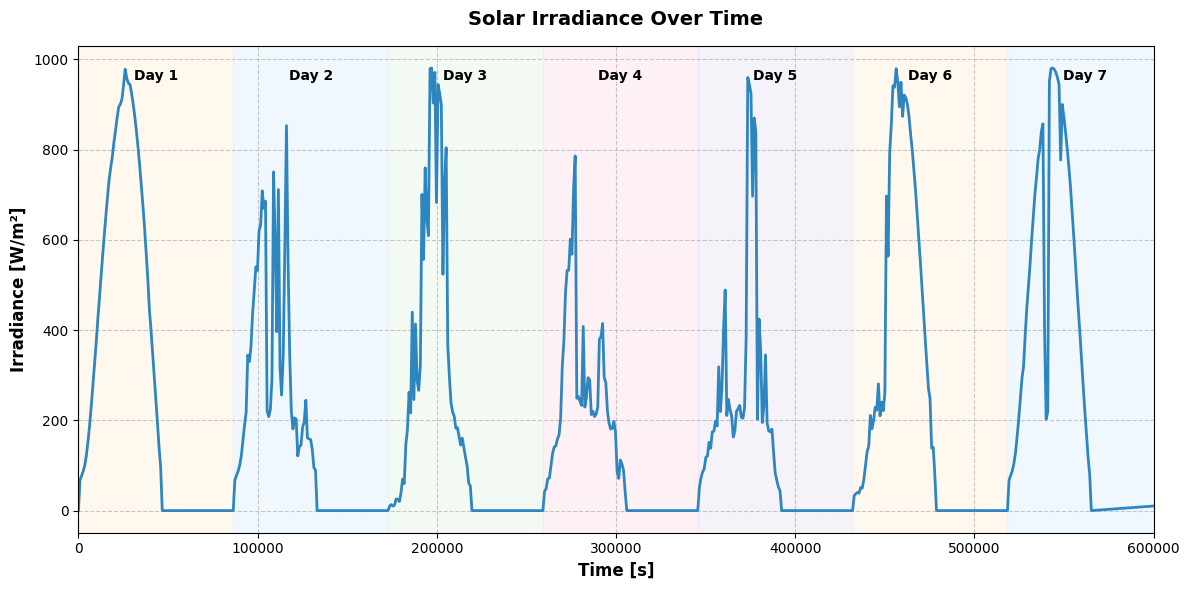

In [7]:
# Display the first six days
BEGIN, END = 0, int(6 * 86_400 / 900)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot main data
ax.plot(timestamp[BEGIN:END], irradiance[BEGIN:END], 
        label='Irradiance', 
        color='#2E86C1', 
        linewidth=2)

# Add colored backgrounds and labels for each day
colors = ['#FFF3E0', '#E3F2FD', '#E8F5E9', '#FCE4EC', '#EDE7F6']
seconds_per_day = 86_400

for day in range(((END * 900) // seconds_per_day) + 1):
    day_start = day * seconds_per_day
    day_end = (day + 1) * seconds_per_day
    
    # Add colored background
    ax.axvspan(day_start, day_end, 
               color=colors[day % len(colors)], 
               alpha=0.5,
               label=f'Day {day+1}')
    
    # Add day label
    ax.text((day_start + day_end)/2, ax.get_ylim()[1]*0.95,
            f'Day {day+1}',
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=10,
            fontweight='bold')

# Customize appearance
ax.set_xlabel('Time [s]', fontsize=12, fontweight='bold')
ax.set_ylabel('Irradiance [W/m²]', fontsize=12, fontweight='bold')
ax.set_title('Solar Irradiance Over Time', fontsize=14, pad=15, fontweight='bold')

# Add grid and legend
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(0, 600_000)

plt.tight_layout()
plt.show()

# PV Panel Datasheet Digitalization

![](datasheet/PVcell/datasheet.bmp)

The [plotdigitizer](https://plotdigitizer.com/app) is easy to use and suggested. Any other software can be used to digitize the datasheet.

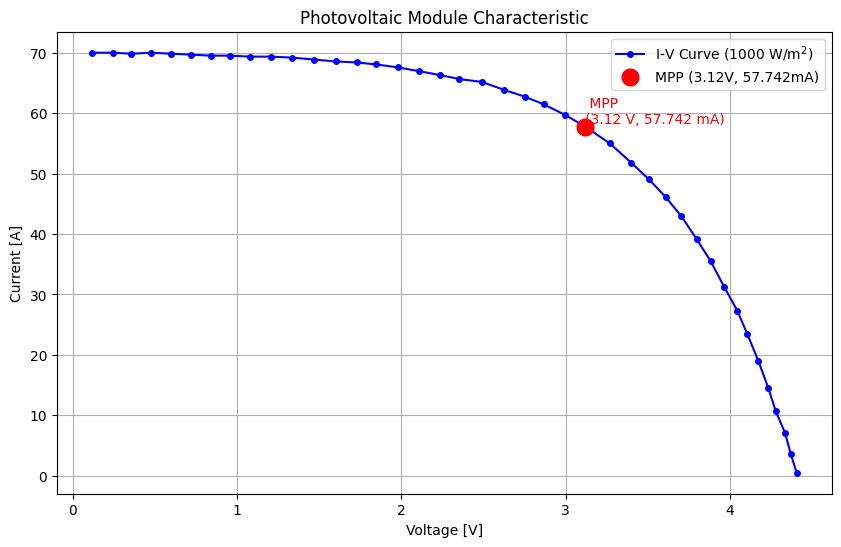

Irradiance: 1000 W/m^2
MPP Voltage: 3.1199 V
MPP Current: 57.7419 mA
Max Power: 180.1502


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


filename = './samples/1000w.txt'  
g = 1000                          


try:
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    voltage_raw = data[:, 0]
    current_raw = data[:, 1]
except Exception as e:
    
    
    voltage_raw = np.array([0.5, 3.0, 1.0, 3.2, 1.5, 3.4, 2.0, 0.0, 2.5, 2.8, 3.5])
    current_raw = np.array([0.03, 0.024, 0.03, 0.015, 0.03, 0.005, 0.029, 0.03, 0.028, 0.026, 0.0])


sort_indices = np.argsort(voltage_raw)
x_sorted = voltage_raw[sort_indices]
y_sorted = current_raw[sort_indices]

#mpp
power = x_sorted * y_sorted
max_idx = np.argmax(power) 

v_mpp = x_sorted[max_idx]
i_mpp = y_sorted[max_idx]
max_p = power[max_idx]


plt.figure(figsize=(10, 6))


plt.plot(x_sorted, y_sorted, 'b-o', label=f'I-V Curve ({g} W/m$^2$)', markersize=4)

plt.plot(v_mpp, i_mpp, 'ro', markersize=12, label=f'MPP ({v_mpp:.2f}V, {i_mpp:.3f}mA)')

plt.text(v_mpp, i_mpp, f' MPP\n({v_mpp:.2f} V, {i_mpp:.3f} mA)', 
         fontsize=10, color='red', verticalalignment='bottom')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.title(f'Photovoltaic Module Characteristic')
plt.legend()
plt.grid(True)
plt.show()


print(f"Irradiance: {g} W/m^2")
print(f"MPP Voltage: {v_mpp:.4f} V")
print(f"MPP Current: {i_mpp:.4f} mA")
print(f"Max Power: {power.max():.4f}")

# DC-DC Converter Datasheet Digitalization

![](datasheet/PV_DCDCconv/efficiency.jpeg)

=== Copy these lines to inc/config_converter_pv.h ===

#define SIZE_CONV_PV 24
static const double V_CONV_PV[SIZE_CONV_PV] = { 0.6459, 0.6773, 0.7864, 0.8749, 1.0136, 1.1997, 1.5119, 1.7951, 1.9824, 2.2697, 2.5861, 2.6361, 2.6819, 2.7277, 2.7569, 2.7860, 2.9937, 3.2765, 3.4801, 3.6527, 3.8761, 4.1871, 4.6905, 4.9790 };
static const double ETA_CONV_PV[SIZE_CONV_PV] = { 64.6824, 67.1739, 71.6304, 76.4808, 80.6522, 83.8485, 85.0931, 85.8398, 85.8896, 88.1298, 90.3700, 85.5909, 80.6127, 75.5847, 71.3532, 68.4161, 68.6417, 67.3568, 65.4633, 63.1640, 60.7971, 56.9086, 51.3971, 47.6439 };

正在生成预览图...


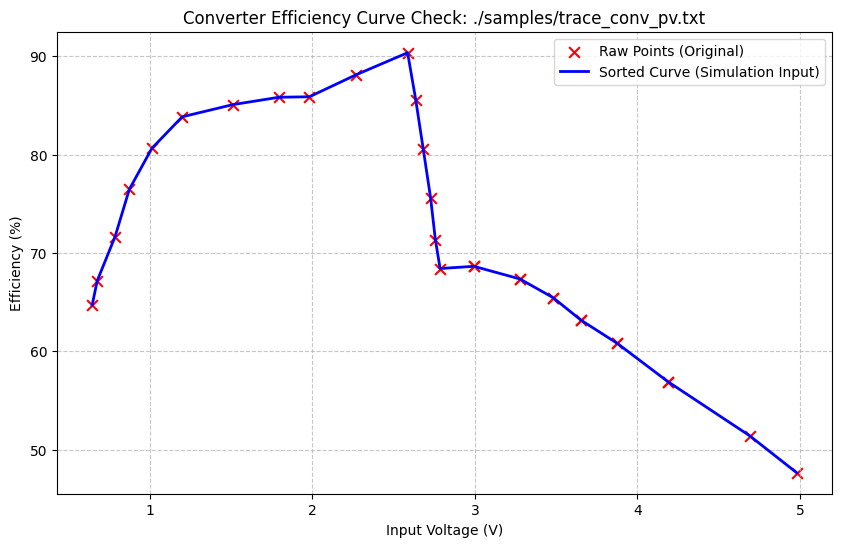

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  


FILE_NAME = './samples/trace_conv_pv.txt' 

try:
    
    df = pd.read_csv(FILE_NAME, delimiter=',')
    
   
    df.columns = [c.strip() for c in df.columns] 
    df.columns = ['V', 'Eta']

    
    df_sorted = df.sort_values(by='V')
    
    
    df_sorted = df_sorted.drop_duplicates()
    
   
    df_sorted = df_sorted.reset_index(drop=True)

    
    v_array = df_sorted['V'].values
    eta_array = df_sorted['Eta'].values
    size = len(v_array)

    print("=== Copy these lines to inc/config_converter_pv.h ===\n")
    print(f"#define SIZE_CONV_PV {size}")
    
    
    v_str = ", ".join([f"{x:.4f}" for x in v_array])
    print(f"static const double V_CONV_PV[SIZE_CONV_PV] = {{ {v_str} }};")
    
    eta_str = ", ".join([f"{x:.4f}" for x in eta_array])
    print(f"static const double ETA_CONV_PV[SIZE_CONV_PV] = {{ {eta_str} }};")
    print("\n==================================================")

    
    print("正在生成预览图...")
    plt.figure(figsize=(10, 6))
    
    
    plt.scatter(df['V'], df['Eta'], color='red', marker='x', s=60, label='Raw Points (Original)')
    
    
    plt.plot(df_sorted['V'], df_sorted['Eta'], color='blue', linewidth=2, label='Sorted Curve (Simulation Input)')
    
    plt.title(f'Converter Efficiency Curve Check: {FILE_NAME}')
    plt.xlabel('Input Voltage (V)')
    plt.ylabel('Efficiency (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    
    plt.show()
    
except FileNotFoundError:
    print(f"wrong， no file {FILE_NAME}")
except Exception as e:
    print(f"error: {e}")

![](datasheet/Battery_DCDCconv/dcdc_fig.jpg)

=== Copy these lines to inc/config_converter_battery.h ===

#define SIZE_CONV_BATT 26
static const double I_CONV_BATT[SIZE_CONV_BATT] = { 0.0138, 0.0172, 0.0214, 0.0268, 0.0322, 0.0388, 0.0486, 0.0633, 0.0797, 0.1046, 0.1311, 0.1753, 0.2515, 0.3778, 0.6282, 1.0561, 1.8965, 3.1883, 5.0594, 9.0111, 15.9172, 27.8855, 50.4911, 89.1882, 142.7007, 262.6783 };
static const double ETA_CONV_BATT[SIZE_CONV_BATT] = { 31.5284, 37.0693, 41.8691, 46.8652, 51.2800, 55.1146, 59.6769, 64.2934, 68.5081, 73.1237, 76.9252, 80.3274, 83.4401, 85.6721, 87.9281, 89.3758, 90.2445, 90.6064, 90.8959, 91.3303, 91.4750, 91.4750, 91.3303, 91.4750, 92.4161, 93.6467 };

正在生成预览图...


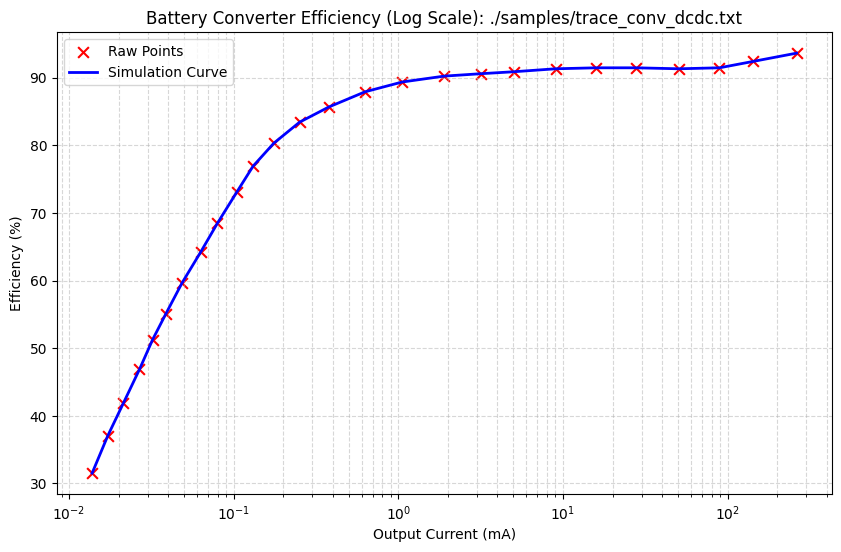

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


FILE_NAME = './samples/trace_conv_dcdc.txt' 

try:
    
    df = pd.read_csv(FILE_NAME, delimiter=',')
    
    
    df.columns = [c.strip() for c in df.columns] 
    
    
    df.columns = ['I', 'Eta']

 
    df_sorted = df.sort_values(by='I')
    
    df_sorted = df_sorted.drop_duplicates()
    
    df_sorted = df_sorted.reset_index(drop=True)

    i_array = df_sorted['I'].values
    eta_array = df_sorted['Eta'].values
    size = len(i_array)

    print("=== Copy these lines to inc/config_converter_battery.h ===\n")
    
    print(f"#define SIZE_CONV_BATT {size}")
    
    
    i_str = ", ".join([f"{x:.4f}" for x in i_array])
    print(f"static const double I_CONV_BATT[SIZE_CONV_BATT] = {{ {i_str} }};")
    
    
    eta_str = ", ".join([f"{x:.4f}" for x in eta_array])
    print(f"static const double ETA_CONV_BATT[SIZE_CONV_BATT] = {{ {eta_str} }};")

    print("\n========================================================")


    print("正在生成预览图...")
    plt.figure(figsize=(10, 6))
    

    plt.scatter(df['I'], df['Eta'], color='red', marker='x', s=60, label='Raw Points')
    
 
    plt.plot(df_sorted['I'], df_sorted['Eta'], color='blue', linewidth=2, label='Simulation Curve')
    

    plt.xscale('log') 
    
    plt.title(f'Battery Converter Efficiency (Log Scale): {FILE_NAME}')
    plt.xlabel('Output Current (mA)')
    plt.ylabel('Efficiency (%)')
    plt.grid(True, which="both", linestyle='--', alpha=0.5) # grid both 对应对数网格
    plt.legend()
    
    plt.show()
    
except FileNotFoundError:
    print(f"no file {FILE_NAME}")
except Exception as e:
    print(f"error: {e}")

# Battery model

![](datasheet/Battery/datasheet.jpg)

In [13]:
from scipy.interpolate import interp1d

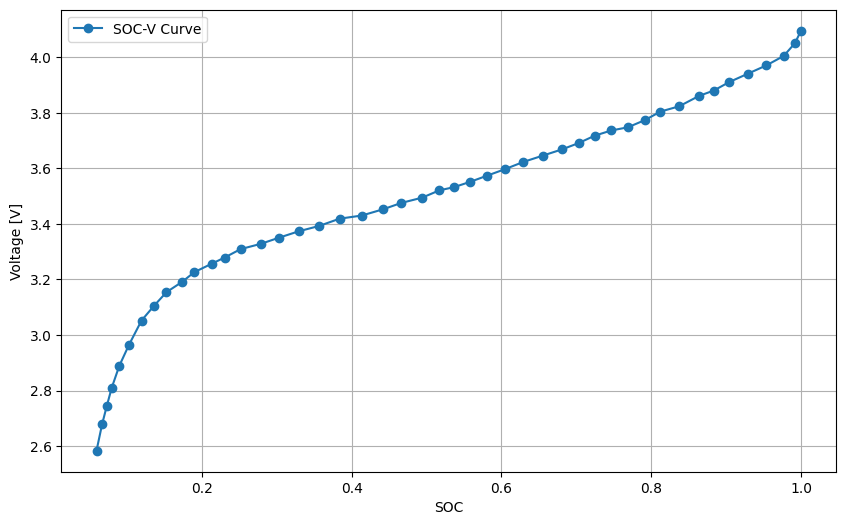

In [14]:
# Extract digitalized points
data = np.loadtxt('./samples/0.5c.txt', delimiter=',', skiprows=1)
voltage = data[:, 0]
soc = data[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage, soc, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX = np.linspace(0, 1, 100)
interp_func = interp1d(soc, voltage, bounds_error=False)
newY = interp_func(newX)


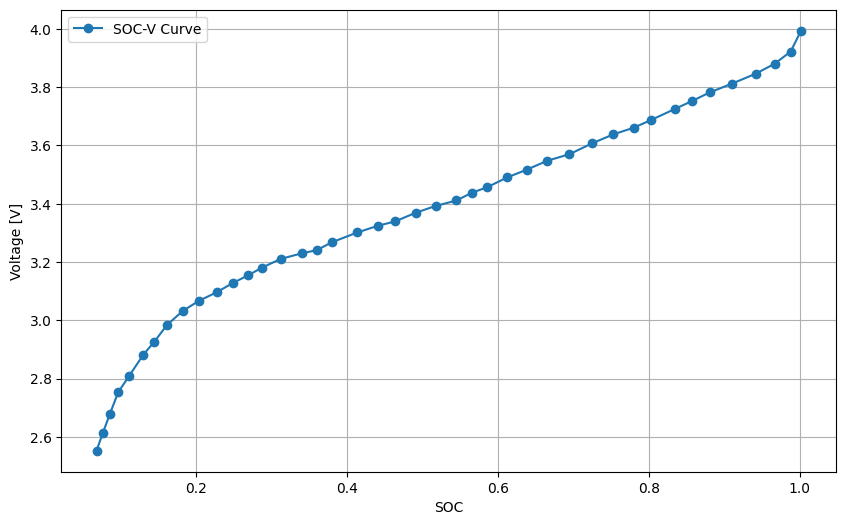

In [12]:
# Do the same for another curve
# TODO
# Extract digitalized points
data = np.loadtxt('./samples/1c.txt', delimiter=',', skiprows=1)
voltage = data[:, 0]
soc = data[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage, soc, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX = np.linspace(0, 1, 100)
interp_func = interp1d(soc, voltage, bounds_error=False)
newY = interp_func(newX)


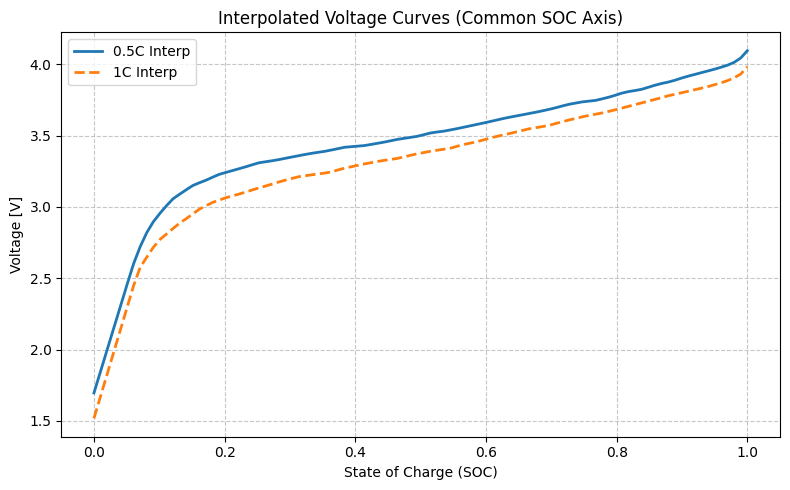

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


soc_common = np.linspace(0, 1, 100) 

#  1 (0.5C) ---
data_05c = np.loadtxt('./samples/0.5c.txt', delimiter=',') 
data_05c = data_05c[data_05c[:, 0].argsort()]
soc_05c_raw = data_05c[:, 0]
voltage_05c_raw = data_05c[:, 1]

f_05c = interp1d(soc_05c_raw, voltage_05c_raw, kind='linear', bounds_error=False, fill_value="extrapolate")
voltage_05c_interp = f_05c(soc_common)


# -2 (1C) ---
data_1c = np.loadtxt('./samples/1c.txt', delimiter=',')
data_1c = data_1c[data_1c[:, 0].argsort()]
soc_1c_raw = data_1c[:, 0]
voltage_1c_raw = data_1c[:, 1]

f_1c = interp1d(soc_1c_raw, voltage_1c_raw, kind='linear', bounds_error=False, fill_value="extrapolate")
voltage_1c_interp = f_1c(soc_common)



plt.figure(figsize=(8, 5))  
plt.plot(soc_common, voltage_05c_interp, '-', label='0.5C Interp', linewidth=2)
plt.plot(soc_common, voltage_1c_interp, '--', label='1C Interp', linewidth=2)

plt.title("Interpolated Voltage Curves (Common SOC Axis)", fontsize=12)
plt.xlabel('State of Charge (SOC)', fontsize=10)
plt.ylabel('Voltage [V]', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# R_internal = (V_05c - V_1c) / (I_1c - I_05c)

### How to use `curve_fit`

In [4]:
from scipy.optimize import curve_fit

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


data_1c = np.loadtxt('./samples/1c.txt', delimiter=',') 
data_05c = np.loadtxt('./samples/0.5c.txt', delimiter=',')

soc_1c = data_1c[:, 0]
v_1c = data_1c[:, 1]
soc_05c = data_05c[:, 0]
v_05c = data_05c[:, 1]


In [6]:
#same x axis
soc_common = np.linspace(0, 1, 100)
f_v1c = interp1d(soc_1c, v_1c, fill_value="extrapolate")
f_v05c = interp1d(soc_05c, v_05c, fill_value="extrapolate")

v_1c_new = f_v1c(soc_common)
v_05c_new = f_v05c(soc_common)

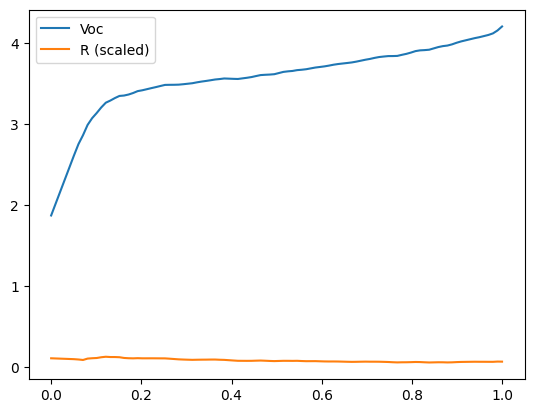

In [ ]:
I_1C = 3200.0   # mA
I_05C = 1600.0  # mA

r_series = (v_05c_new - v_1c_new) / (I_1C - I_05C)

#  Voc
v_open_circuit = v_1c_new + I_1C * r_series


plt.plot(soc_common, v_open_circuit, label='Voc')
plt.plot(soc_common, r_series * 1000, label='R (scaled)') # R通常很小，放大看
plt.legend()
plt.show()

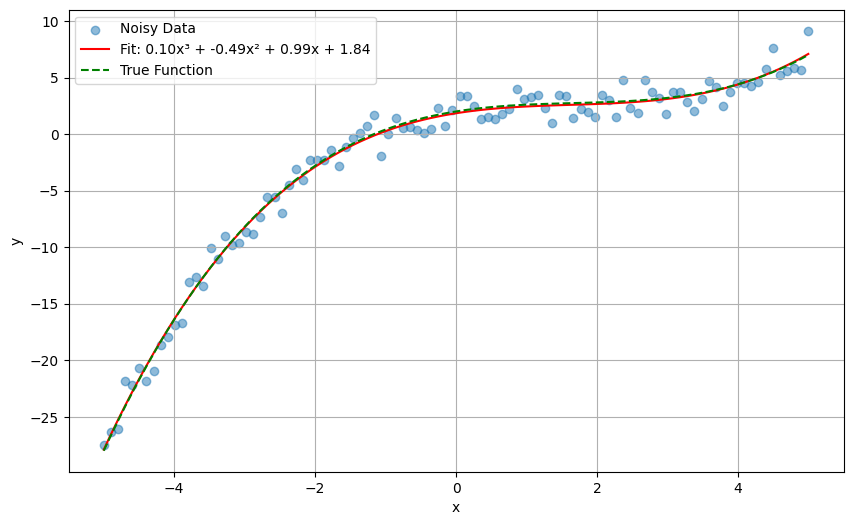

In [8]:
# Define polynomial function (3rd degree)
def poly_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Generate data
x_data = np.linspace(-5, 5, 100)
true_params = [0.1, -0.5, 1.0, 2.0]  # True coefficients
y_true = poly_func(x_data, *true_params)
noise = np.random.normal(0, 1, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(poly_func, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, poly_func(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x³ + {popt[1]:.2f}x² + {popt[2]:.2f}x + {popt[3]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

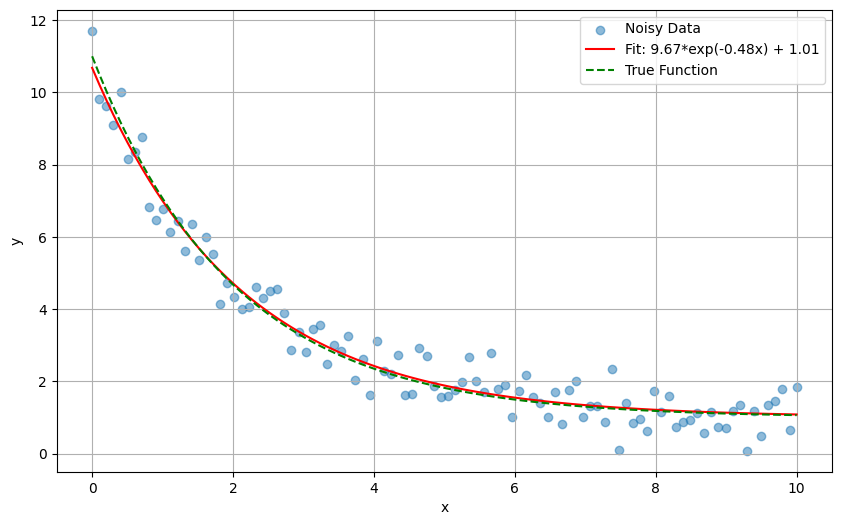

In [9]:
# Define exponential decay function
def exp_decay(x, A, k, c):
    return A * np.exp(-k * x) + c

# Generate data
x_data = np.linspace(0, 10, 100)
true_params = [10.0, 0.5, 1.0]  # [amplitude, decay rate, offset]
y_true = exp_decay(x_data, *true_params)
noise = np.random.normal(0, 0.5, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(exp_decay, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, exp_decay(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}*exp(-{popt[1]:.2f}x) + {popt[2]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Overfitting Example

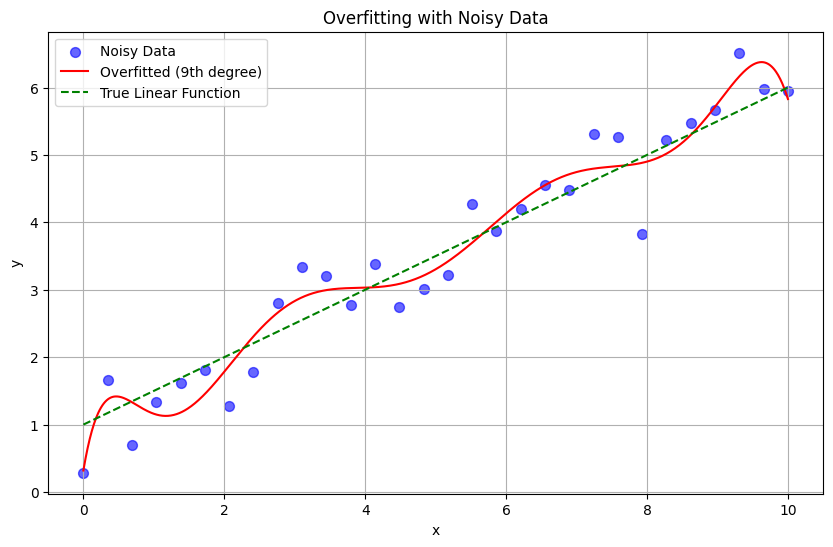

In [10]:
# Define high degree polynomial for overfitting
def complex_func(x, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    return (a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + 
            a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9)

# Generate more points with higher noise
x_data = np.linspace(0, 10, 30)  # Increased to 30 points
true_params = [1.0, 0.5]
y_true = true_params[0] + true_params[1] * x_data
noise = np.random.normal(0, 0.5, len(x_data))  # Increased noise standard deviation to 0.5
y_data = y_true + noise

# Fit with overly complex function
initial_guess = np.ones(10)
popt, pcov = curve_fit(complex_func, x_data, y_data, p0=initial_guess)

# Generate smooth points for plotting
x_smooth = np.linspace(0, 10, 1000)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', s=50, alpha=0.6, label='Noisy Data')
plt.plot(x_smooth, complex_func(x_smooth, *popt), 'r-', 
         label='Overfitted (9th degree)')
plt.plot(x_smooth, true_params[0] + true_params[1]*x_smooth, 'g--',
         label='True Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Overfitting with Noisy Data')
plt.grid(True)
plt.show()

In [ ]:
# Fit the data to obtain V_OC(SOC)

def battery_poly_func(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e


popt_voc, _ = curve_fit(battery_poly_func, soc_common, v_open_circuit)



C++ Voc Coeffs (a,b,c,d,e): [-18.648428    44.69485903 -36.60037036  12.55851733   2.0546454 ]
C++ R Coeffs (a,b,c,d,e): [-0.00045524  0.00116024 -0.00091822  0.000177    0.00010329]


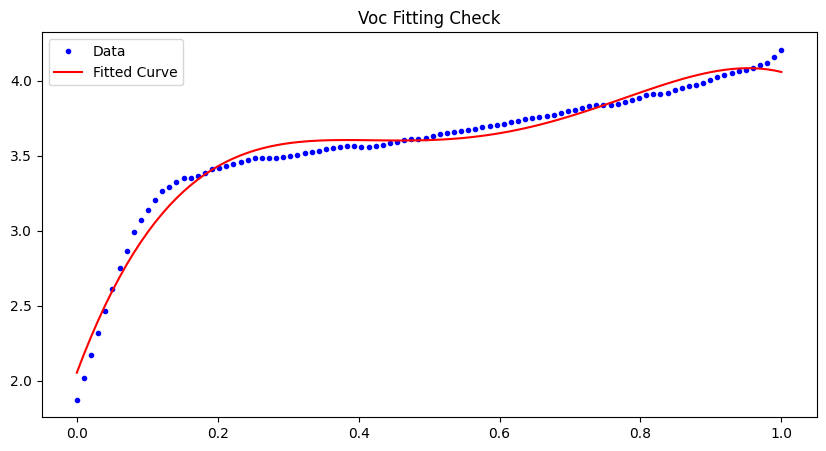

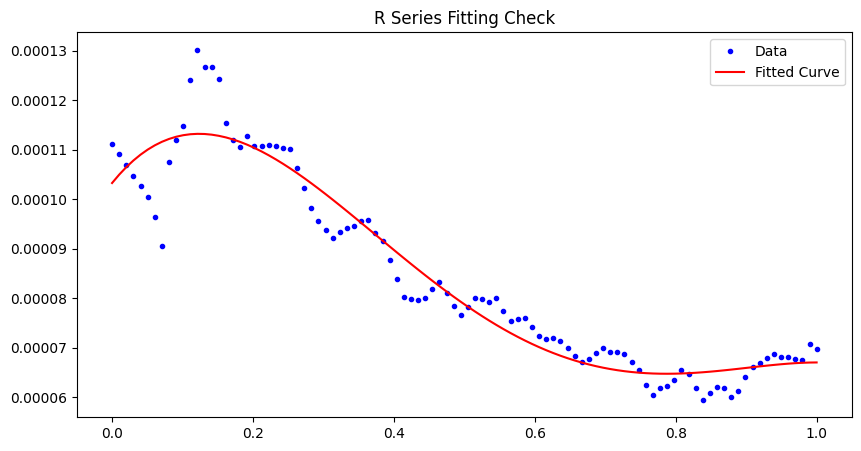

In [ ]:
# Fit the data to obtain R(SOC)
# TODO
#  R
popt_r, _ = curve_fit(battery_poly_func, soc_common, r_series)


print("C++ Voc Coeffs (a,b,c,d,e):", popt_voc)
print("C++ R Coeffs (a,b,c,d,e):", popt_r)


plt.figure(figsize=(10, 5))
plt.plot(soc_common, v_open_circuit, 'b.', label='Data')
plt.plot(soc_common, battery_poly_func(soc_common, *popt_voc), 'r-', label='Fitted Curve')
plt.title("Voc Fitting Check")
plt.legend()
plt.show()

# verify
plt.figure(figsize=(10, 5))
plt.plot(soc_common, r_series, 'b.', label='Data')
plt.plot(soc_common, battery_poly_func(soc_common, *popt_r), 'r-', label='Fitted Curve')
plt.title("R Series Fitting Check")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def load_simulation_data(filepath):
   
    df = pd.read_csv(filepath, sep='\s+', engine='python')
    
    
    df.columns = df.columns.str.replace('%', '')
    
 
    df['day'] = df['time'] / 86400  # 86400秒 = 1天
    df['hour'] = df['time'] / 3600
    
    return df


df_serial = load_simulation_data('se_sim_trace.txt')
df_parallel = load_simulation_data('sim_trace.txt')

print("load complete！")
print(f"time for serial: {df_serial['day'].max():.2f} 天")
print(f"time for parallel: {df_parallel['day'].max():.2f} 天")

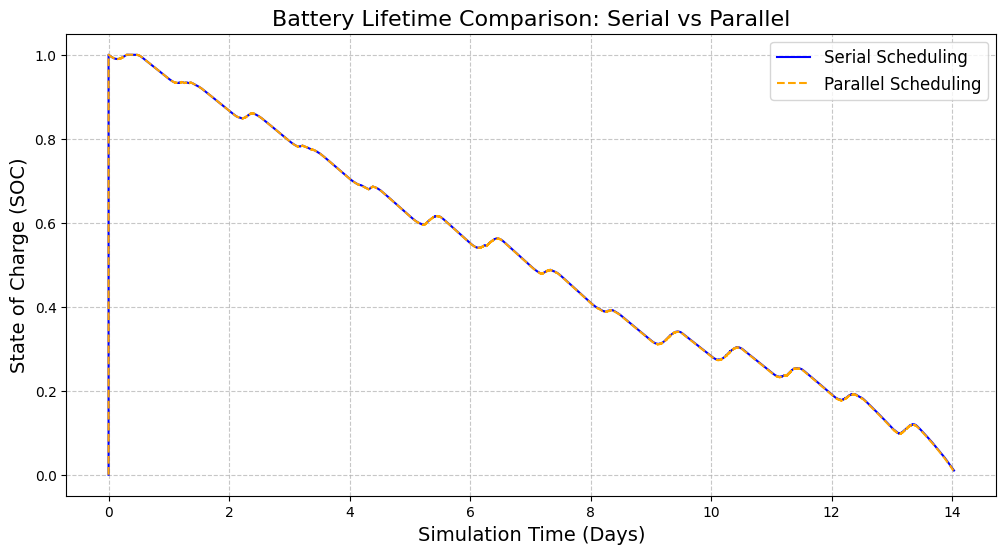

In [ ]:
plt.figure(figsize=(12, 6))


plt.plot(df_serial['day'], df_serial['soc'], label='Serial Scheduling', color='blue', linewidth=1.5)


plt.plot(df_parallel['day'], df_parallel['soc'], label='Parallel Scheduling', color='orange', linestyle='--', linewidth=1.5)

plt.title('Battery Lifetime Comparison: Serial vs Parallel', fontsize=16)
plt.xlabel('Simulation Time (Days)', fontsize=14)
plt.ylabel('State of Charge (SOC)', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)


plt.show()

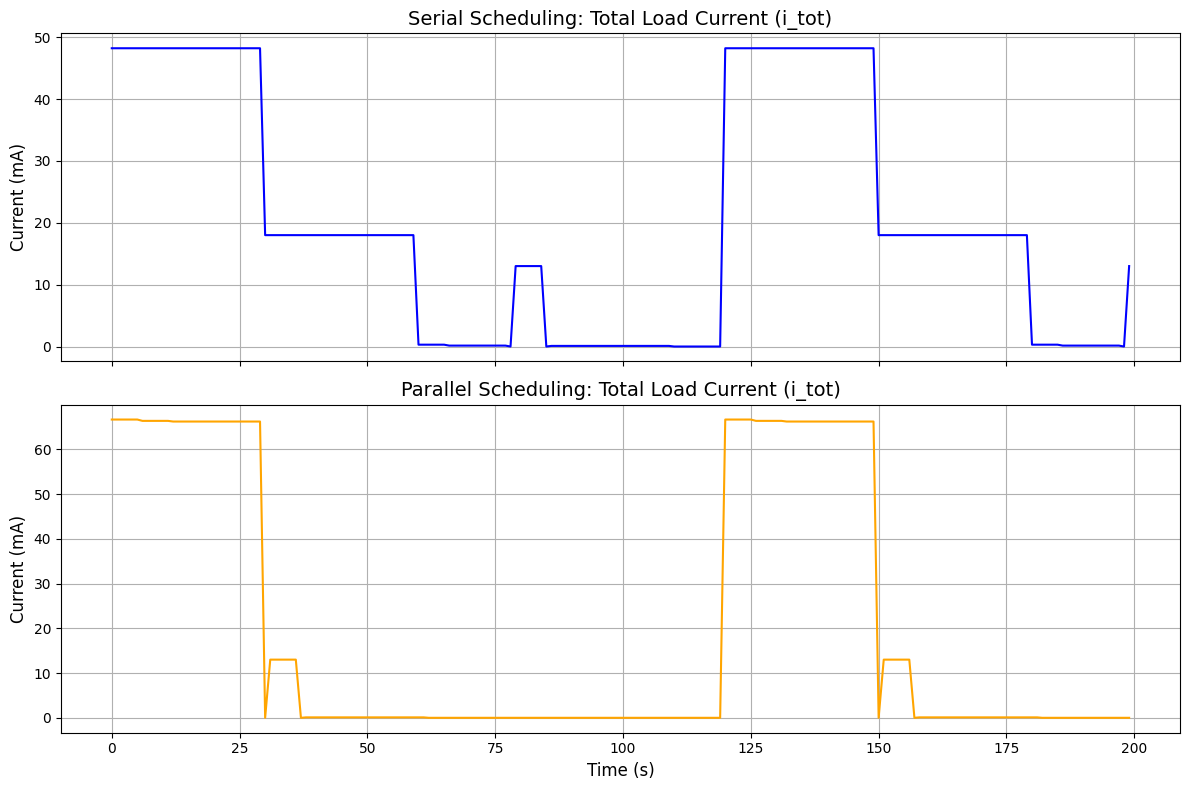

In [ ]:

limit_sec = 200
subset_serial = df_serial[df_serial['time'] < limit_sec]
subset_parallel = df_parallel[df_parallel['time'] < limit_sec]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


ax1.plot(subset_serial['time'], subset_serial['i_tot'], color='blue')
ax1.set_title('Serial Scheduling: Total Load Current (i_tot)', fontsize=14)
ax1.set_ylabel('Current (mA)', fontsize=12)
ax1.grid(True)


ax2.plot(subset_parallel['time'], subset_parallel['i_tot'], color='orange')
ax2.set_title('Parallel Scheduling: Total Load Current (i_tot)', fontsize=14)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Current (mA)', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

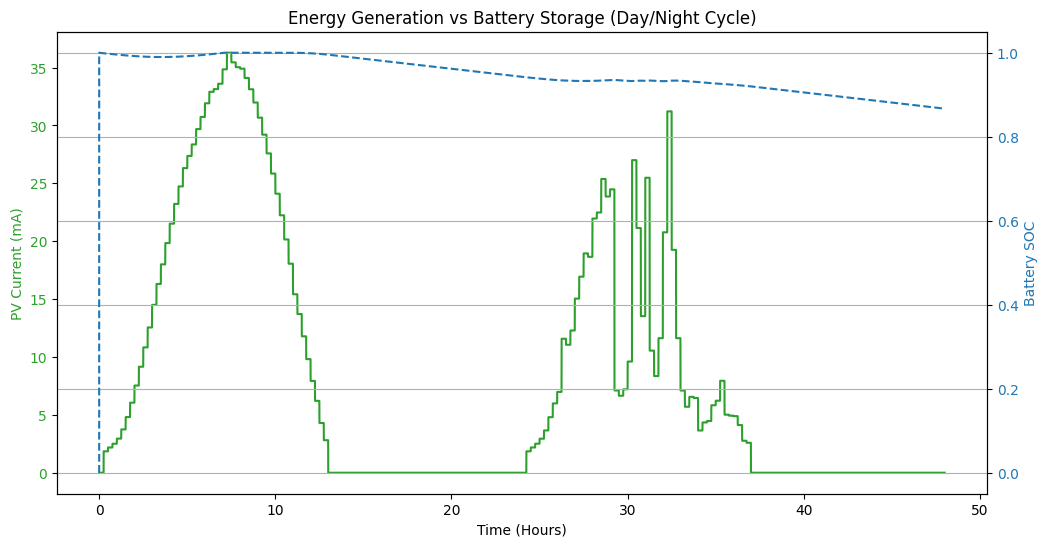

In [ ]:

start_time = 0
end_time = 86400 * 2 # first two days

df_view = df_parallel[(df_parallel['time'] >= start_time) & (df_parallel['time'] <= end_time)]

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:green'
ax1.set_xlabel('Time (Hours)')
ax1.set_ylabel('PV Current (mA)', color=color)
ax1.plot(df_view['time']/3600, df_view['real_i_pv'], color=color, label='PV Generation')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Battery SOC', color=color)  
ax2.plot(df_view['time']/3600, df_view['soc'], color=color, linestyle='--', label='Battery SOC')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Energy Generation vs Battery Storage (Day/Night Cycle)')
plt.grid(True)
plt.show()